## OUTLOOK ON ADVANCED TECHNIQUES

In [2]:
#IMPORTING LIBRARIES

In [104]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

import ipywidgets as widgets
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")

In [4]:
#LOADING DATASET

In [28]:
X=pd.read_csv('wine-clustering.csv')
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##### TASK 1

In [6]:
#DATA PREPARATION

In [46]:
#scaling the dataset
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


##### TASK 2

##### DIMENSION REDUCTION

In [29]:
cols=list(X.columns)
cols

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

In [77]:
def make_kmeans(attributs=cols, scaler=MinMaxScaler(), dimension_reduction='pca',perplexity=None, components=2, k=3, show='features'):
    attributs = list(attributs)
    scaled_values = scaler.fit_transform(X[attributs])
    
    components = min(components, len(attributs))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'tsne':
        values = TSNE( perplexity = perplexity).fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
    
    cluster = KMeans(n_clusters=k).fit_predict(values)
#     print('Silhouette score:', silhouette_score(scaled_values, cluster))
    if show == 'features':
        df_plot = X.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}
                 , vars=[c for c in df_plot.columns if c != 'cluster'] 
                )


style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans 
            , attributs=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
                                          ,description='Features', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
                                          ,description='Scaler', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('tSNE', 'tsne'), ('without', None)]
                                                  ,description='Dimensionality Reduction'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , perplexity=widgets.SelectionSlider(options=range(1, 50), value=16
                                                  ,description='Perplexity'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            
             , components=widgets.SelectionSlider(options=range(1, 5), value=4
                                                ,description='PCA components'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , k=widgets.SelectionSlider(options=range(2, 8)
                                                ,description='k'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
                                                  ,description='Show'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)

            )

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…

##### K MEANS

In [75]:
range_n_clusters = [2, 3, 4, 5, 6]
components=2

In [108]:
#PCA
score1=[]
for n_clusters in range_n_clusters:
    scaled_values = scaler.fit_transform(df_scaled)
    
    components = min(components, len(cols))
    values = PCA().fit_transform(scaled_values)[:, :components]
    
    cluster = KMeans(n_clusters=n_clusters).fit_predict(values)
    s=silhouette_score(scaled_values, cluster)
    print('Silhouette score for PCA :', s,'where n_clusters=',n_clusters)
    score1.append(s)

Silhouette score for PCA : 0.29872218159747743 where n_clusters= 2
Silhouette score for PCA : 0.2997081530816115 where n_clusters= 3
Silhouette score for PCA : 0.22601807739036192 where n_clusters= 4
Silhouette score for PCA : 0.17843002058265028 where n_clusters= 5
Silhouette score for PCA : 0.13193598396414707 where n_clusters= 6


In [106]:
#TSNE
score2=[]
for n_clusters in range_n_clusters:
    scaled_values = scaler.fit_transform(df_scaled)
    
    components = min(components, len(cols))
    values = TSNE( perplexity = 16).fit_transform(scaled_values)[:, :components]
    
    cluster = KMeans(n_clusters=n_clusters).fit_predict(values)
    s=silhouette_score(scaled_values, cluster)
    print('Silhouette score for TSNE :', s,'where n_clusters=',n_clusters)
    score2.append(s)

Silhouette score for TSNE : 0.2881432534334275 where n_clusters= 2
Silhouette score for TSNE : 0.2958807255596777 where n_clusters= 3
Silhouette score for TSNE : 0.2477320134522712 where n_clusters= 4
Silhouette score for TSNE : 0.1664032591105145 where n_clusters= 5
Silhouette score for TSNE : 0.11614953196233008 where n_clusters= 6


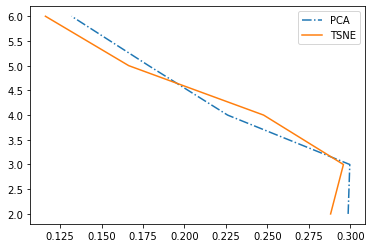

In [124]:
#Comparing PCA and TSNE

plt.plot(score1,range_n_clusters,'-.',label='PCA')
plt.plot(score2,range_n_clusters,label='TSNE')
plt.legend()
plt.show()

Choosing TSNE Dimension Reduction technique

##### TASK 3

##### MODELLING PIPELINE

##### K MEANS

In [81]:
components=3

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=2))])
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=4))])
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5))])


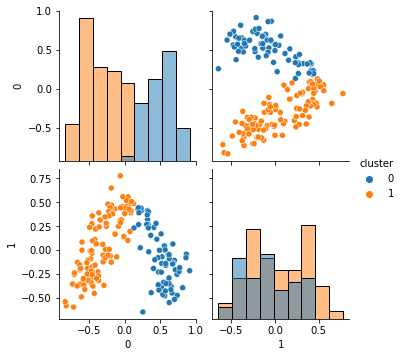

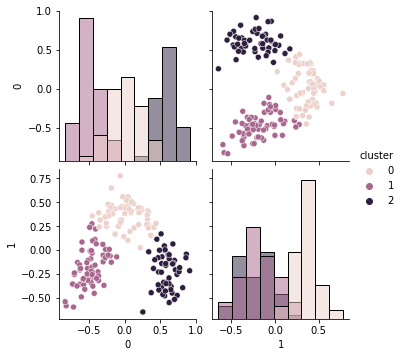

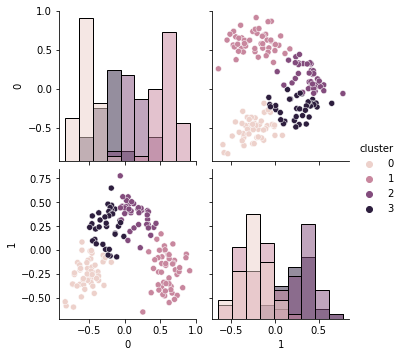

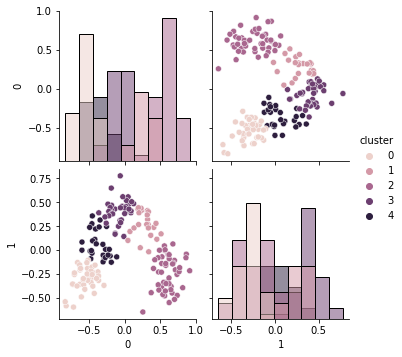

In [148]:
steps = [('scaler', MinMaxScaler()), ('dimension_reduction', PCA()), ('kmeans', KMeans())]
pipeline=Pipeline(steps)
for n_clusters in [2,3,4,5]:
    pipline = pipeline.set_params(kmeans__n_clusters=n_clusters)
    pipline = pipeline.set_params(dimension_reduction__n_components=components)
    print(pipeline)
    X_ = pipeline.fit_predict(X)   
    df_plot = pd.DataFrame(PCA().fit_transform((MinMaxScaler().fit_transform(X)))[:, :components])    
    df_plot['cluster'] = X_        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}
                 , vars=[c for c in df_plot.columns if c != 'cluster'] 
                )


##### DBSCAN

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=3)),
                ('dbscan', DBSCAN(eps=0.3, min_samples=10))])
Found 4 outliers
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=3)),
                ('dbscan', DBSCAN(eps=0.3, min_samples=20))])
Found 15 outliers
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=3)),
                ('dbscan', DBSCAN(eps=0.3, min_samples=30))])
Found 46 outliers
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=3)),
                ('dbscan', DBSCAN(eps=0.3, min_samples=40))])
Found 129 outliers


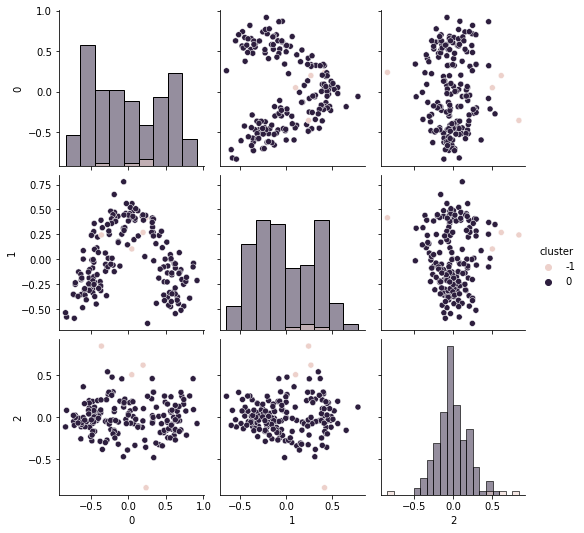

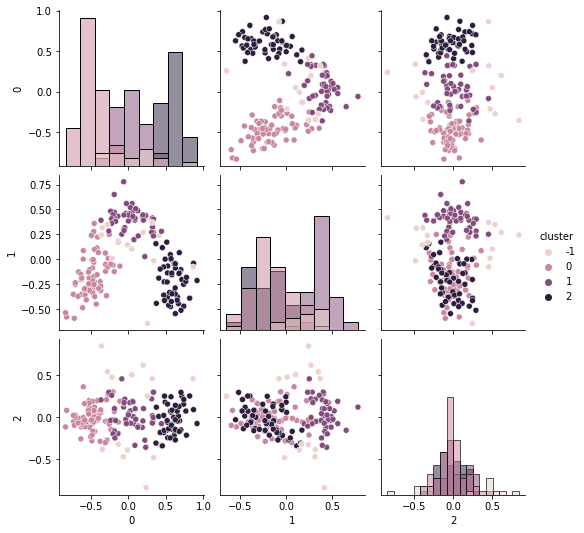

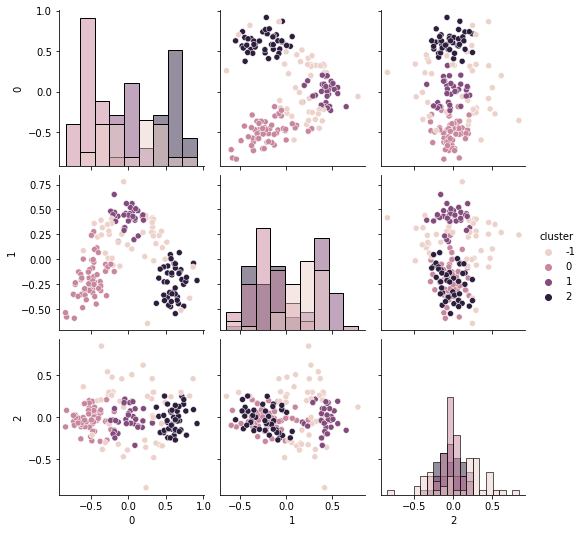

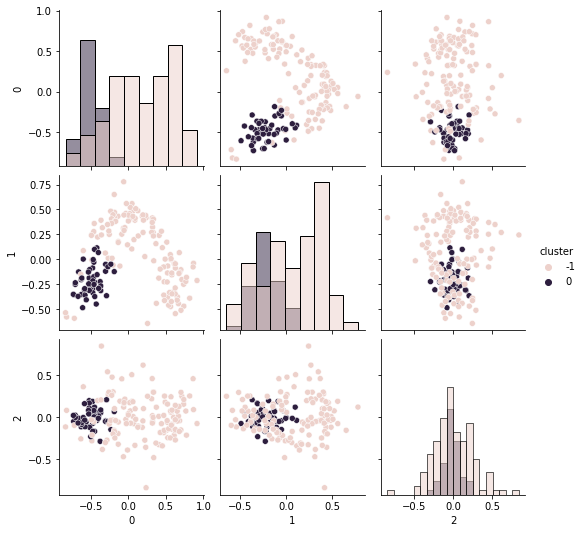

In [98]:
steps = [('scaler', MinMaxScaler()), ('dimension_reduction', PCA()), ('dbscan', DBSCAN())]
pipeline = Pipeline(steps)
for n_clusters in [10,20,30,40]:
    pipline = pipeline.set_params(dbscan__min_samples=n_clusters)
    pipline = pipeline.set_params(dbscan__eps=0.3)
    pipline = pipeline.set_params(dimension_reduction__n_components=components)
    print(pipeline)
    X_ = pipeline.fit_predict(X)   
    df_plot = pd.DataFrame(PCA().fit_transform((MinMaxScaler().fit_transform(X)))[:, :components])    
    df_plot['cluster'] = X_   
    print('Found', np.sum(df_plot['cluster'] == -1),'outliers')
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}
                 , vars=[c for c in df_plot.columns if c != 'cluster'] 
                )

In DBSCAN we can see there is increase in outliers if n_clusters is increasing

If density is higher,it is considering more data points as outliers.

### CONCLUSION:-

K MEANS clustering is considered as their clusters are more clear and doesn't affect the original data much

In [ ]:
# END